In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
data = pd.read_csv('task-1.csv')
data.head()


,x,y
0,10.529,39.105
1,10.799,40.584
2,11.698,39.883
3,12.851,39.411
4,13.565,40.760


In [35]:
x = data.x.values
y = data.y.values

coefs = np.polyfit(np.log(x),y,deg=1)

a,b= coefs

print (a,b)

3.3902409977137995 31.52920121929614


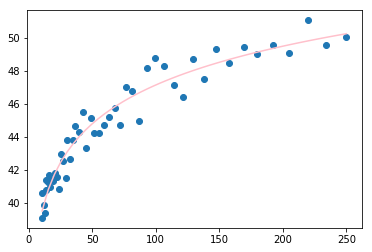

In [36]:

x_val = np.linspace(np.min(x), np.max(x),num=50)
y_val = np.polyval(coefs,np.log(x_val))

sns.set_style()
plt.scatter(x,y)
plt.plot(x_val,y_val,c = 'pink')

In [37]:
def RSS(y, y_pred):
    return np.sum(np.square(y - y_pred))

y_pred = np.polyval(coefs, np.log(x))

RSS_mod = RSS(y,y_pred)
RSS_base = RSS(y,np.mean(y_pred))

R2 = 1-(RSS_mod/RSS_base)

print (R2)

0.9411567093138288


polyfit finds the vector of coefficients in a polynomial equation that minimzes the Residual Sum of Squares

1. Gradient descent is an iterative algorithm that takes steps towards the optimal solution while polyfit computes the optimal coefs analytically with OLS
2. Gradient descent is a more general algorithm capable of optimising more than one cost functions while polyfit is able to only optimise the RSS

In [38]:
data2 = pd.read_csv('task-2.csv')
data2.head()

,x1,x2,x3,y
0,7.892,318.818,162.970,2112.420
1,8.830,303.180,181.399,2096.231
2,13.811,296.231,145.849,2067.045
3,12.863,325.830,167.996,2269.262
4,13.698,254.035,171.892,1966.604


In [39]:
x = data2.drop('y' , axis = 1)
y = data2.y

from sklearn.model_selection import train_test_split

x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size = 0.2, random_state=0)

In [40]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_tr,y_tr)
y_pred = lr.predict(x_te)

def MAE(y,y_pred):
    return np.mean(np.abs(y-y_pred))

MAE(y_te,y_pred)

104.78843301492141

In [41]:
from sklearn.linear_model import HuberRegressor
hb = HuberRegressor()

hb.fit(x_tr,y_tr)
y_pred_hb = hb.predict(x_te)

MAE(y_te,y_pred_hb)


83.9081244377246

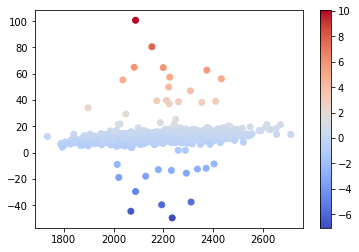

In [42]:
def z_score(y):
    return (y-y.mean())/y.std()
z_score_x1 = z_score(x_tr.x1)
z_score_x2 = z_score(x_tr.x2)
z_score_x3 = z_score(x_tr.x3)

sns.set_style()
plt.scatter(y_tr,x_tr.x1,c = z_score_x1, cmap=plt.cm.coolwarm)
plt.colorbar()
plt.show()




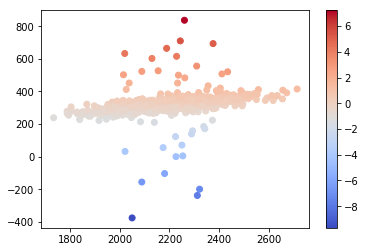

In [43]:
plt.scatter(y_tr,x_tr.x2,c = z_score_x2,cmap = 'coolwarm')
plt.colorbar()
plt.show()

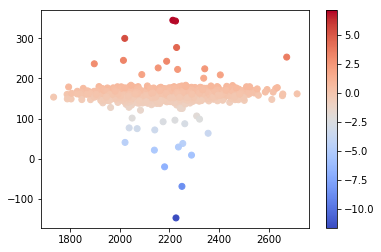

In [44]:
plt.scatter(y_tr,x_tr.x3,c = z_score_x3, cmap = 'coolwarm')
plt.colorbar()
plt.show()

In [45]:
idx1 = (np.abs(z_score(x_tr.x1))<=2.5)
idx2 = (np.abs(z_score(x_tr.x2))<=2.5)
idx3 = (np.abs(z_score(x_tr.x3))<=2.5)

x_tr = x_tr[idx1&idx2&idx3]
y_tr = y_tr[idx1&idx2&idx3]

In [46]:
lr.fit(x_tr,y_tr)
y_pred = lr.predict(x_te)

def MAE(y,y_pred):
    return np.mean(np.abs(y-y_pred))

MAE(y_te,y_pred)

69.33444316575402

In [54]:
data3 = pd.read_csv('task-3.csv')

x = data3.x.values
y = data3.y.values

In [55]:
from sklearn.preprocessing import PolynomialFeatures

In [58]:
pf_obj = PolynomialFeatures(degree=10)
x_pol = pf_obj.fit_transform(x[:,np.newaxis])

In [61]:
x_tr,x_te,y_tr,y_te = train_test_split(x_pol,y,test_size = 0.5, random_state=0)

The Test RSS is:  1.570459921978028   and the train RSS is:  0.6838998903863828


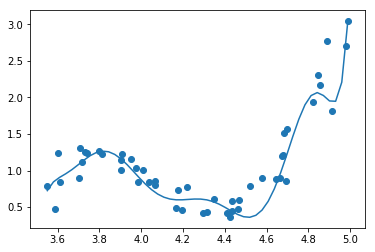

In [75]:
lr.fit(x_tr,y_tr)
y_pred = lr.predict(x_te)
y_pred2 = lr.predict(x_tr)
RSS10 = np.sum(np.square(y_te-y_pred))
RSS10tr = np.sum(np.square(y_tr-y_pred2))

x_plt = np.linspace(np.min(x), np.max(x), num = 50)
x_plt_pol = pf_obj.fit_transform(x_plt[:,np.newaxis])

ypred_plt = lr.predict(x_plt_pol)

plt.scatter(x,y)
plt.plot(x_plt,ypred_plt)
print('The Test RSS is: ',RSS10,' ','and the train RSS is: ',RSS10tr)

In [71]:
from sklearn.linear_model import Ridge
def RSS(y,y_pred):
    return np.sum(np.square(y-y_pred))

alphas = np.logspace(-30,20, num = 300)

train_sc = []
test_sc = []

for alpha in alphas:
    rd = Ridge(alpha)
    rd.fit(x_tr,y_tr)
    y_pred = rd.predict(x_tr)
    train_rss = RSS(y_tr,y_pred)
    y_pred =rd.predict(x_te)
    test_rss = RSS(y_te,y_pred)
    train_sc.append(train_rss)
    test_sc.append(test_rss)



C:\Users\poulo\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.780431e-23
  overwrite_a=True).T
C:\Users\poulo\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.349496e-22
  overwrite_a=True).T
C:\Users\poulo\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.771600e-22
  overwrite_a=True).T
C:\Users\poulo\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number7.234052e-22
  overwrite_a=True).T
C:\Users

The Test RSS is:  0.8998766971946911   and the train RSS is:  1.074766684008152


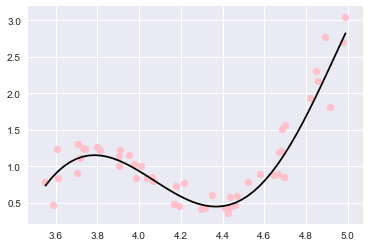

In [81]:
idx = np.argmin(test_sc)
b_a = alphas[idx]

rd = Ridge(b_a)
rd.fit(x_tr,y_tr)
y_pred = rd.predict(x_te)
y_pred_tr = rd.predict(x_tr)
RSS_te = RSS(y_te,y_pred)
RSS_tr = RSS(y_tr,y_pred_tr)

ypred_plt = rd.predict(x_plt_pol)

sns.set()
plt.scatter(x,y,c = 'pink')
plt.plot(x_plt,ypred_plt, c = 'black')


print('The Test RSS is: ',RSS_te,' ','and the train RSS is: ',RSS_tr)